In [31]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

import sys
import os
data_path = os.path.abspath('../data')
sys.path.append(data_path)

utils_path = os.path.abspath('../utils')
sys.path.append(utils_path)

import reviews_processing
import load_and_find_party_winners
import plotting_utils


In [30]:
%load_ext autoreload
%autoreload 2

In [2]:
reviews_path = "/Users/marijazelic/Downloads/reviews_df.csv"
users_path = "/Users/marijazelic/Downloads/users.csv"



users_reviews = reviews_processing.Reviews(users_path, reviews_path)
year_list = list(np.arange(2004, 2017, 1, dtype=int))
results = users_reviews.aggregate_preferences_year(year_list)


In [54]:
winners_path = "/Users/marijazelic/ada-2024-project-adavengers/data/generated/party_winners_over_years.csv"
winners = load_and_find_party_winners.state_winner_years(winners_path)

In [49]:
needed = winners.loc[cluster_1]
election_winners_by_state = needed.groupby('state').apply(lambda group: dict(zip(group['year'], group['winner']))).to_dict()



In [50]:
election_winners_by_state

{'New York': {2004: 'Democrat',
  2008: 'Democrat',
  2012: 'Democrat',
  2016: 'Democrat'},
 'Pennsylvania': {2004: 'Democrat',
  2008: 'Democrat',
  2012: 'Democrat',
  2016: 'Republican'}}

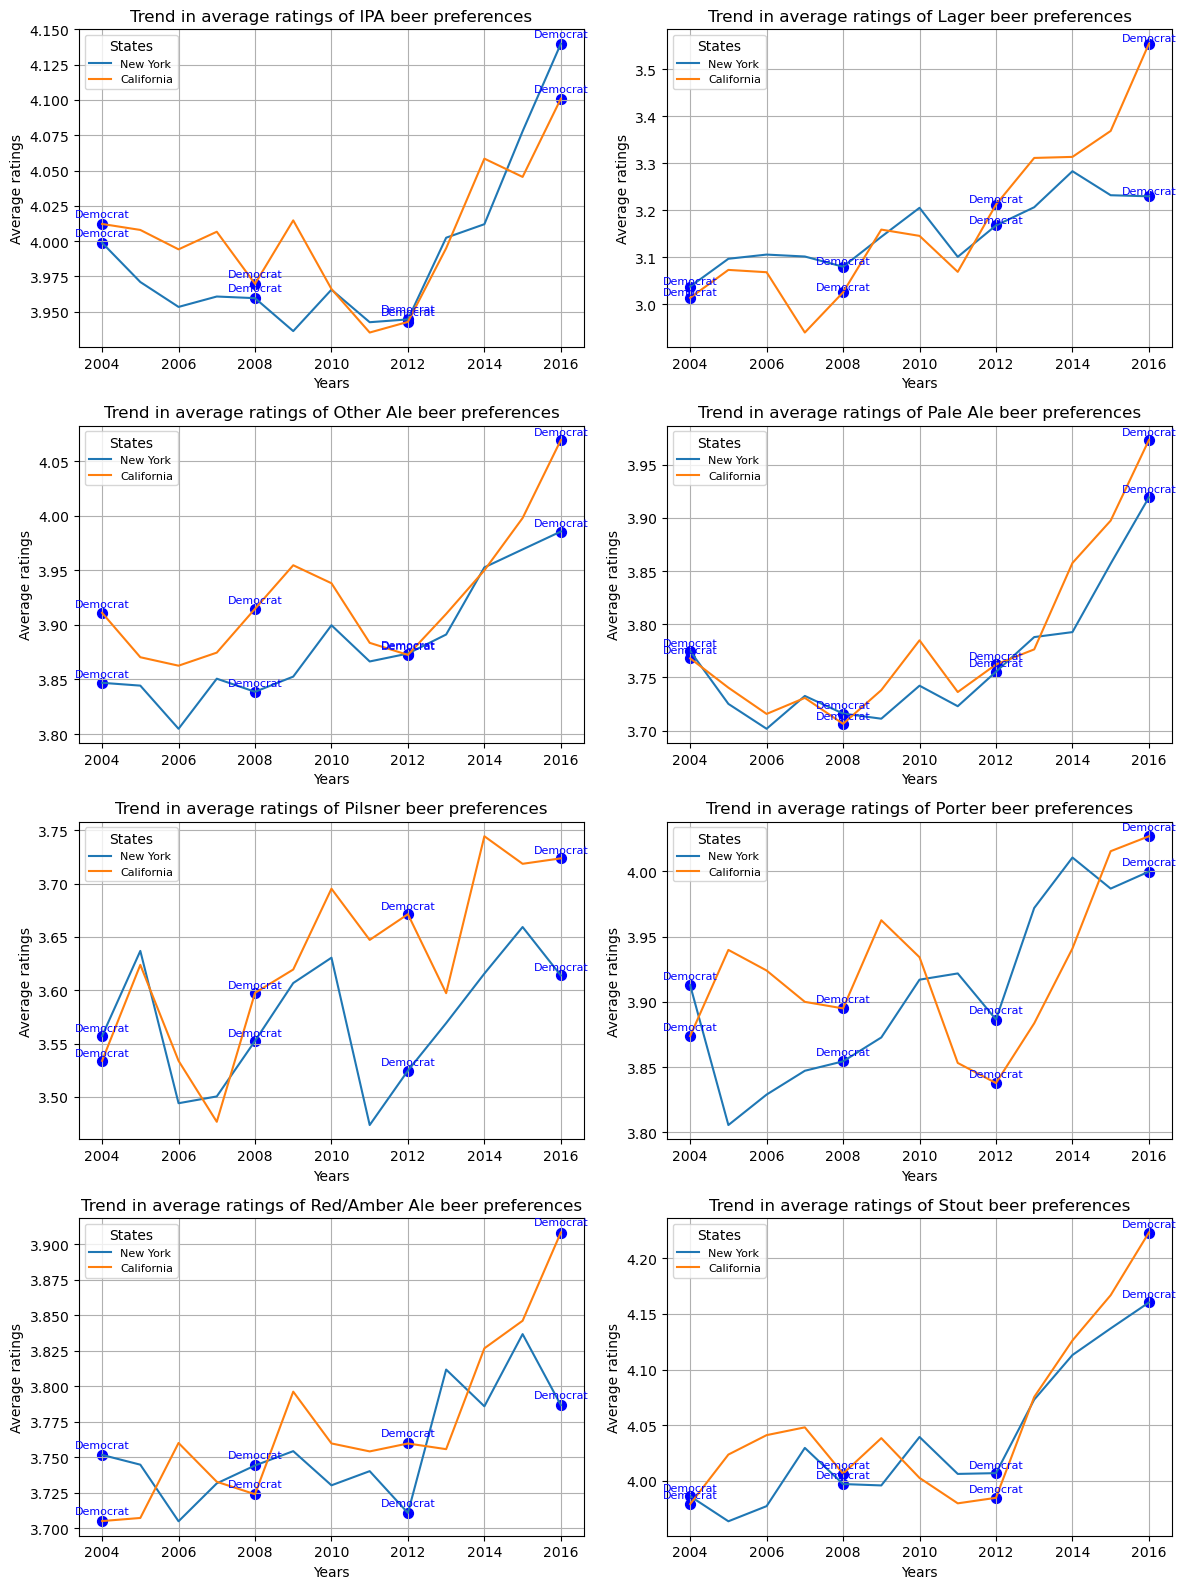

In [73]:
cluster_1 = ['New York', 'California']
plotting_utils.plot_beer_pref_trends(results, winners, cluster_1)

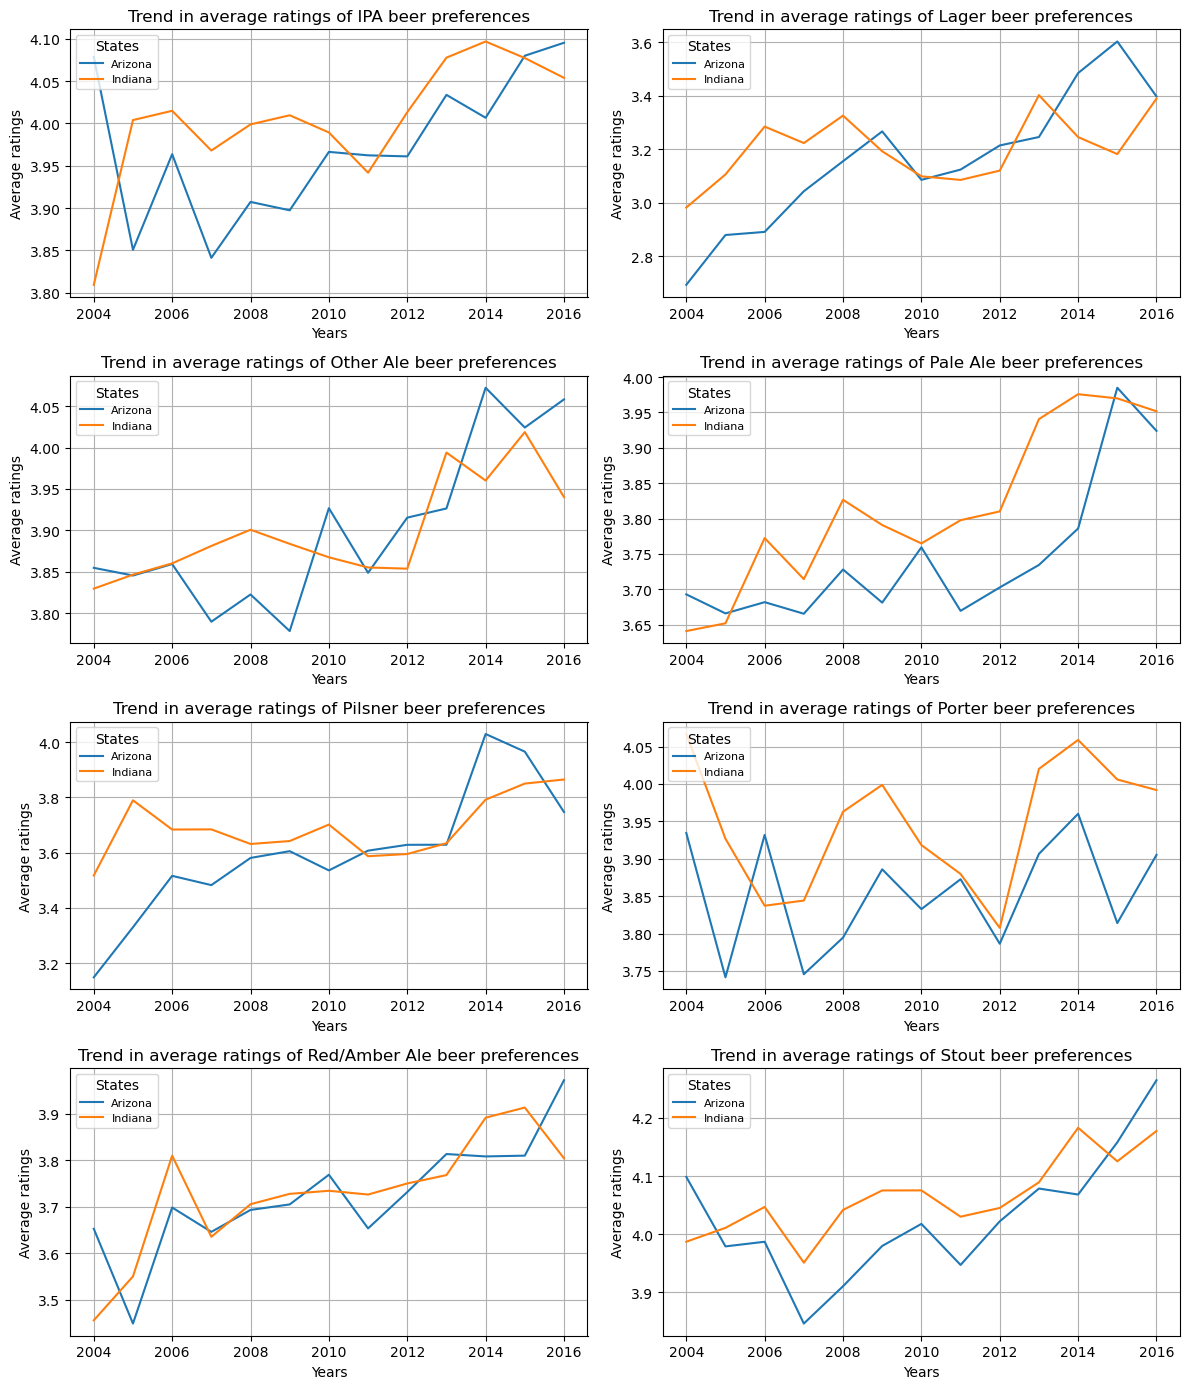

In [74]:
cluster_1 = ['Arizona', 'Indiana']
styles = ['IPA', 'Lager', 'Other Ale', 'Pale Ale', 'Pilsner', 'Porter', 'Red/Amber Ale', 'Stout']

# Identify the states of interest
states = results.loc[cluster_1]

# Create grid for plotting 
fig, axes = plt.subplots(4, 2, figsize=(12, 14))
axes = axes.flatten()

for i, style in enumerate(styles):
    
    # Set the ax where we are plotting
    ax = axes[i]
    
    # Identify the styles
    style_names = [f"{style}_{year}" for year in year_list]
    beer_styles = states[style_names]
    
    for index, row in beer_styles.iterrows():
        ax.plot(year_list, row, label=f"{index}")
        
    ax.set_title(f"Trend in average ratings of {style} beer preferences")
    ax.set_xlabel('Years')
    ax.set_ylabel('Average ratings')
    ax.legend(title='States', fontsize=8, loc='upper left')
    ax.grid(True)
    
# Adjust layout
plt.tight_layout()
plt.show()